In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2022-12-08 17:42:37.350550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 17:42:37.580430: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 17:42:37.580450: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 17:42:38.284602: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## Kitchenware Classification

Competition Link: [Insert link gere]
Dataset: [Insert link here]

Create the ff:
- Brief description of the project
- How to download the dataset

General Steps:
- Gather the datasets using ImageDataGenerator() and flow_from_directory
- Create the base model. Loading the Xception network and remove the dense layers (include_top=False). Since we dont want to retrain our convolutional layer, we use trainable = False
- create the final model with the base_model, pooling and dense layer. all of this will be used for the inputs and outputs parameter for the final model
- Train the Model
- adjust the learning rate
- Checkpointing
- Adding more layers
- Regularization and dropout
- Data augmentation
- Test the model

## Dataset

In [2]:
!pwd

/home/chanchan/Documents/all_about_data/kitchenware_classification


In [3]:
!ls

 dataset  'Project Notebook.ipynb'   requirements.txt


In [4]:
import os

Set the project directory

In [5]:
project_dir = '.'
dir_list = os.listdir(project_dir)
dir_list

['.ipynb_checkpoints',
 'Project Notebook.ipynb',
 'dataset',
 '.gitignore',
 '.venv',
 'requirements.txt',
 '.git']

Set the dataset directory

In [6]:
dataset_dir = project_dir + '/dataset'
dataset_dir

'./dataset'

In [7]:
dir_list = os.listdir(dataset_dir)
dir_list

['sample_submission.csv',
 'images',
 'train.csv',
 'kitchenware-classification.zip',
 'test.csv']

In [8]:
base_images_dir = dataset_dir + '/images'

In [9]:
dir_list = os.listdir(base_images_dir)
dir_list

['1834.jpg',
 '6193.jpg',
 '5415.jpg',
 '1454.jpg',
 '7560.jpg',
 '6083.jpg',
 '2429.jpg',
 '5577.jpg',
 '5982.jpg',
 '6620.jpg',
 '0278.jpg',
 '2360.jpg',
 '4343.jpg',
 '7782.jpg',
 '6461.jpg',
 '3378.jpg',
 '0080.jpg',
 '3470.jpg',
 '8198.jpg',
 '6910.jpg',
 '2634.jpg',
 '8498.jpg',
 '0901.jpg',
 '4103.jpg',
 '2159.jpg',
 '8596.jpg',
 '0274.jpg',
 '0319.jpg',
 '7846.jpg',
 '6021.jpg',
 '2348.jpg',
 '8487.jpg',
 '4580.jpg',
 '0279.jpg',
 '1439.jpg',
 '5426.jpg',
 '6643.jpg',
 '3626.jpg',
 '1068.jpg',
 '8291.jpg',
 '6719.jpg',
 '2104.jpg',
 '8520.jpg',
 '2082.jpg',
 '5525.jpg',
 '3543.jpg',
 '5611.jpg',
 '0136.jpg',
 '3357.jpg',
 '4862.jpg',
 '5958.jpg',
 '6099.jpg',
 '2229.jpg',
 '2033.jpg',
 '1641.jpg',
 '3529.jpg',
 '8658.jpg',
 '3390.jpg',
 '1590.jpg',
 '4493.jpg',
 '6357.jpg',
 '0851.jpg',
 '6844.jpg',
 '1464.jpg',
 '3632.jpg',
 '3417.jpg',
 '7039.jpg',
 '7496.jpg',
 '2826.jpg',
 '1309.jpg',
 '7791.jpg',
 '8891.jpg',
 '8299.jpg',
 '0996.jpg',
 '8581.jpg',
 '7003.jpg',
 '4796.jpg',

Directories

In [10]:
project_dir = '.'
dataset_dir = project_dir + '/dataset'
base_images_dir = dataset_dir + '/images'

In [40]:
dirs = {
    'project_dir': '.',
    'dataset_dir': project_dir + '/dataset',
    'base_images_dir': dataset_dir + '/images',
}

In [69]:
file_info = pd.read_csv(dataset_dir + '/train.csv', dtype = 'string')

In [70]:
file_info

,Id,label
0,0560,glass
1,4675,cup
2,0875,glass
3,4436,spoon
4,8265,plate
...,...,...
5554,6742,cup
5555,1574,cup
5556,6746,knife
5557,3562,cup


In [71]:
file_info['filename'] = file_info['Id'].astype(str) + '.jpg'

In [72]:
file_info

,Id,label,filename
0,0560,glass,0560.jpg
1,4675,cup,4675.jpg
2,0875,glass,0875.jpg
3,4436,spoon,4436.jpg
4,8265,plate,8265.jpg
...,...,...,...
5554,6742,cup,6742.jpg
5555,1574,cup,1574.jpg
5556,6746,knife,6746.jpg
5557,3562,cup,3562.jpg


In [15]:
# Check if there are duplicate values
file_info.loc[file_info.duplicated(), :]

,Id,label,filename


In [106]:
file_info = file_info.sort_values(['label','Id'], ascending = [True, True])
file_info

,Id,label,filename
3226,0003,cup,0003.jpg
282,0006,cup,0006.jpg
911,0009,cup,0009.jpg
3973,0017,cup,0017.jpg
1666,0020,cup,0020.jpg
...,...,...,...
2631,9364,spoon,9364.jpg
4818,9398,spoon,9398.jpg
4753,9424,spoon,9424.jpg
3576,9432,spoon,9432.jpg


In [112]:
sample_df = file_info
sample_df['rank'] = sample_df.groupby(['label'])['Id'].rank('dense', ascending=True)
sample_df

,Id,label,filename,rank
3226,0003,cup,0003.jpg,1.0
282,0006,cup,0006.jpg,2.0
911,0009,cup,0009.jpg,3.0
3973,0017,cup,0017.jpg,4.0
1666,0020,cup,0020.jpg,5.0
...,...,...,...,...
2631,9364,spoon,9364.jpg,985.0
4818,9398,spoon,9398.jpg,986.0
4753,9424,spoon,9424.jpg,987.0
3576,9432,spoon,9432.jpg,988.0


In [113]:
sample_df.groupby('label')['rank'].max()

label
cup      1135.0
fork      557.0
glass     742.0
knife     909.0
plate    1227.0
spoon     989.0
Name: rank, dtype: float64

In [16]:
dir_list = os.listdir(base_images_dir)
dir_list

['1834.jpg',
 '6193.jpg',
 '5415.jpg',
 '1454.jpg',
 '7560.jpg',
 '6083.jpg',
 '2429.jpg',
 '5577.jpg',
 '5982.jpg',
 '6620.jpg',
 '0278.jpg',
 '2360.jpg',
 '4343.jpg',
 '7782.jpg',
 '6461.jpg',
 '3378.jpg',
 '0080.jpg',
 '3470.jpg',
 '8198.jpg',
 '6910.jpg',
 '2634.jpg',
 '8498.jpg',
 '0901.jpg',
 '4103.jpg',
 '2159.jpg',
 '8596.jpg',
 '0274.jpg',
 '0319.jpg',
 '7846.jpg',
 '6021.jpg',
 '2348.jpg',
 '8487.jpg',
 '4580.jpg',
 '0279.jpg',
 '1439.jpg',
 '5426.jpg',
 '6643.jpg',
 '3626.jpg',
 '1068.jpg',
 '8291.jpg',
 '6719.jpg',
 '2104.jpg',
 '8520.jpg',
 '2082.jpg',
 '5525.jpg',
 '3543.jpg',
 '5611.jpg',
 '0136.jpg',
 '3357.jpg',
 '4862.jpg',
 '5958.jpg',
 '6099.jpg',
 '2229.jpg',
 '2033.jpg',
 '1641.jpg',
 '3529.jpg',
 '8658.jpg',
 '3390.jpg',
 '1590.jpg',
 '4493.jpg',
 '6357.jpg',
 '0851.jpg',
 '6844.jpg',
 '1464.jpg',
 '3632.jpg',
 '3417.jpg',
 '7039.jpg',
 '7496.jpg',
 '2826.jpg',
 '1309.jpg',
 '7791.jpg',
 '8891.jpg',
 '8299.jpg',
 '0996.jpg',
 '8581.jpg',
 '7003.jpg',
 '4796.jpg',

In [17]:
len(dir_list)

9367

In [18]:
count_jpg = len([i for i in dir_list if i[-3:] == 'jpg'])
count_jpg

9367

So all files are in jpeg format

**Check duplicate images**

In [23]:
from imagededup.methods import PHash
phasher = PHash()

encodings = phasher.encode_images(image_dir=base_images_dir)

duplicates = phasher.find_duplicates(encoding_map=encodings)

2022-12-08 17:55:14,071: INFO Start: Calculating hashes...
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9367/9367 [00:13<00:00, 716.94it/s]
2022-12-08 17:55:27,434: INFO End: Calculating hashes!
2022-12-08 17:55:27,450: INFO Start: Evaluating hamming distances for getting duplicates
2022-12-08 17:55:27,452: INFO Start: Retrieving duplicates using Cython Brute force algorithm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9367/9367 [00:08<00:00, 1169.52it/s]
2022-12-08 17:55:35,717: INFO End: Retrieving duplicates using Cython Brute force algorithm
2022-12-08 17:55:35,718: INFO End: Evaluating hamming distances for getting duplicates


In [24]:
duplicates

{'1834.jpg': [],
 '6193.jpg': [],
 '5415.jpg': ['2292.jpg'],
 '1454.jpg': [],
 '7560.jpg': [],
 '6083.jpg': [],
 '2429.jpg': [],
 '5577.jpg': ['0413.jpg', '1878.jpg'],
 '5982.jpg': [],
 '6620.jpg': [],
 '0278.jpg': ['4529.jpg'],
 '2360.jpg': ['7859.jpg'],
 '4343.jpg': ['3338.jpg'],
 '7782.jpg': [],
 '6461.jpg': [],
 '3378.jpg': [],
 '0080.jpg': [],
 '3470.jpg': [],
 '8198.jpg': [],
 '6910.jpg': [],
 '2634.jpg': [],
 '8498.jpg': [],
 '0901.jpg': [],
 '4103.jpg': [],
 '2159.jpg': [],
 '8596.jpg': [],
 '0274.jpg': ['2412.jpg'],
 '0319.jpg': [],
 '7846.jpg': [],
 '6021.jpg': [],
 '2348.jpg': [],
 '8487.jpg': [],
 '4580.jpg': ['3760.jpg', '4538.jpg', '8904.jpg'],
 '0279.jpg': [],
 '1439.jpg': [],
 '5426.jpg': [],
 '6643.jpg': [],
 '3626.jpg': ['6205.jpg'],
 '1068.jpg': [],
 '8291.jpg': [],
 '6719.jpg': [],
 '2104.jpg': [],
 '8520.jpg': [],
 '2082.jpg': ['6998.jpg', '5386.jpg'],
 '5525.jpg': [],
 '3543.jpg': [],
 '5611.jpg': [],
 '0136.jpg': ['7323.jpg'],
 '3357.jpg': [],
 '4862.jpg': [],
 '

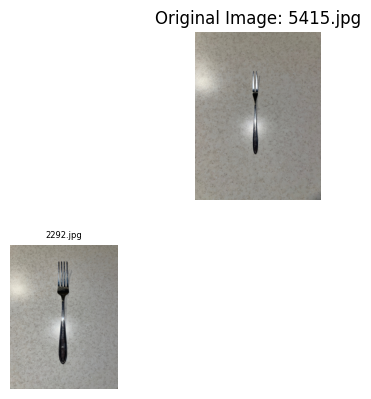

In [25]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=base_images_dir,
                duplicate_map=duplicates,
                filename='5415.jpg')

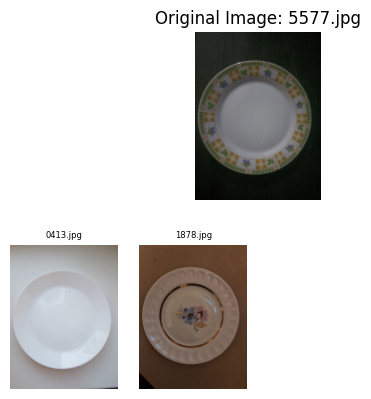

In [26]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=base_images_dir,
                duplicate_map=duplicates,
                filename='5577.jpg')

In [37]:
from collections import defaultdict
from hashlib import md5
from pathlib import Path

import PIL

In [32]:
image_dir = Path(base_images_dir)

In [34]:
hash_dict = defaultdict(list)
for image in image_dir.glob('*.jpg'):
    with image.open('rb') as f:
        img_hash = md5(f.read()).hexdigest()
        hash_dict[img_hash].append(image)
len(hash_dict)

9361

In [35]:
duplicate_img = []
for k, v in hash_dict.items():
    if len(v) > 1:
        if v[0].name != v[1].name:
            duplicate_img.append(v[0])
            duplicate_img.append(v[1])
            print(v)
len(duplicate_img)

[PosixPath('dataset/images/7063.jpg'), PosixPath('dataset/images/7196.jpg')]
[PosixPath('dataset/images/8532.jpg'), PosixPath('dataset/images/6833.jpg')]
[PosixPath('dataset/images/0237.jpg'), PosixPath('dataset/images/4234.jpg')]
[PosixPath('dataset/images/5428.jpg'), PosixPath('dataset/images/7103.jpg')]
[PosixPath('dataset/images/3458.jpg'), PosixPath('dataset/images/4162.jpg')]
[PosixPath('dataset/images/7469.jpg'), PosixPath('dataset/images/6624.jpg')]


12

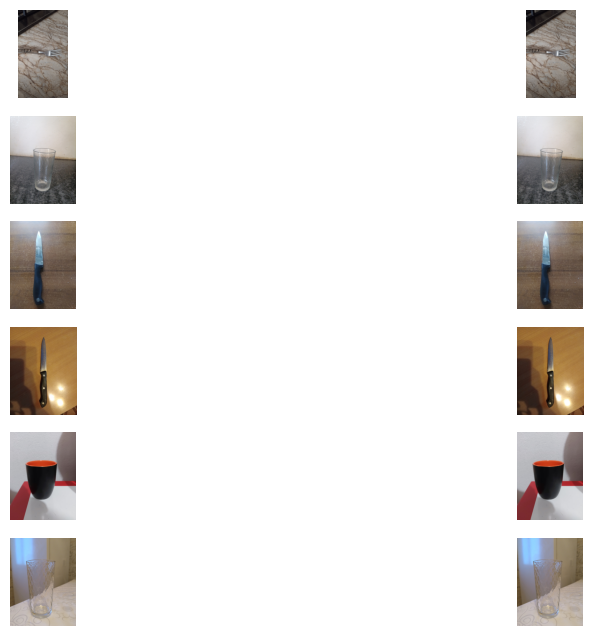

In [38]:
plt.figure(figsize=(12,8))

for idx, img in enumerate(duplicate_img):
    im = PIL.Image.open(img)
    plt.subplot(6,2, idx+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

Since there are duplicates, it might affect the model performance. But for now, we will proceed

**Dataset Preparation**

In [41]:
dirs

{'project_dir': '.',
 'dataset_dir': './dataset',
 'base_images_dir': './dataset/images'}

In [42]:
dirs['project_dir']

'.'

In [43]:
file_info.head()

,Id,label,filename
0,560,glass,560.jpg
1,4675,cup,4675.jpg
2,875,glass,875.jpg
3,4436,spoon,4436.jpg
4,8265,plate,8265.jpg


In [44]:
dir_list = os.listdir(dirs['base_images_dir'])
dir_list

['1834.jpg',
 '6193.jpg',
 '5415.jpg',
 '1454.jpg',
 '7560.jpg',
 '6083.jpg',
 '2429.jpg',
 '5577.jpg',
 '5982.jpg',
 '6620.jpg',
 '0278.jpg',
 '2360.jpg',
 '4343.jpg',
 '7782.jpg',
 '6461.jpg',
 '3378.jpg',
 '0080.jpg',
 '3470.jpg',
 '8198.jpg',
 '6910.jpg',
 '2634.jpg',
 '8498.jpg',
 '0901.jpg',
 '4103.jpg',
 '2159.jpg',
 '8596.jpg',
 '0274.jpg',
 '0319.jpg',
 '7846.jpg',
 '6021.jpg',
 '2348.jpg',
 '8487.jpg',
 '4580.jpg',
 '0279.jpg',
 '1439.jpg',
 '5426.jpg',
 '6643.jpg',
 '3626.jpg',
 '1068.jpg',
 '8291.jpg',
 '6719.jpg',
 '2104.jpg',
 '8520.jpg',
 '2082.jpg',
 '5525.jpg',
 '3543.jpg',
 '5611.jpg',
 '0136.jpg',
 '3357.jpg',
 '4862.jpg',
 '5958.jpg',
 '6099.jpg',
 '2229.jpg',
 '2033.jpg',
 '1641.jpg',
 '3529.jpg',
 '8658.jpg',
 '3390.jpg',
 '1590.jpg',
 '4493.jpg',
 '6357.jpg',
 '0851.jpg',
 '6844.jpg',
 '1464.jpg',
 '3632.jpg',
 '3417.jpg',
 '7039.jpg',
 '7496.jpg',
 '2826.jpg',
 '1309.jpg',
 '7791.jpg',
 '8891.jpg',
 '8299.jpg',
 '0996.jpg',
 '8581.jpg',
 '7003.jpg',
 '4796.jpg',

In [48]:
import shutil

In [52]:
sorted_dataset = dataset_dir + '/sorted_dataset'

if os.path.exists(sorted_dataset):
    shutil.rmtree(sorted_dataset)
os.makedirs(sorted_dataset)

In [74]:
file_loc = dict(zip(file_info['filename'],file_info['label']))
file_loc

{'0560.jpg': 'glass',
 '4675.jpg': 'cup',
 '0875.jpg': 'glass',
 '4436.jpg': 'spoon',
 '8265.jpg': 'plate',
 '2422.jpg': 'cup',
 '4617.jpg': 'knife',
 '6446.jpg': 'fork',
 '8882.jpg': 'cup',
 '4257.jpg': 'knife',
 '8705.jpg': 'cup',
 '5952.jpg': 'cup',
 '1533.jpg': 'cup',
 '1717.jpg': 'knife',
 '1228.jpg': 'fork',
 '4138.jpg': 'cup',
 '4499.jpg': 'plate',
 '2220.jpg': 'plate',
 '1085.jpg': 'cup',
 '8987.jpg': 'spoon',
 '3847.jpg': 'cup',
 '7143.jpg': 'spoon',
 '7042.jpg': 'knife',
 '5511.jpg': 'spoon',
 '6333.jpg': 'spoon',
 '8307.jpg': 'cup',
 '5589.jpg': 'spoon',
 '6826.jpg': 'knife',
 '3354.jpg': 'plate',
 '0241.jpg': 'plate',
 '7406.jpg': 'knife',
 '2495.jpg': 'cup',
 '6477.jpg': 'glass',
 '9407.jpg': 'cup',
 '9008.jpg': 'spoon',
 '7541.jpg': 'knife',
 '3201.jpg': 'plate',
 '4853.jpg': 'plate',
 '2031.jpg': 'glass',
 '7395.jpg': 'plate',
 '5596.jpg': 'plate',
 '5272.jpg': 'knife',
 '1279.jpg': 'fork',
 '5964.jpg': 'cup',
 '4047.jpg': 'plate',
 '8622.jpg': 'knife',
 '9249.jpg': 'kni

In [65]:
dirs

{'project_dir': '.',
 'dataset_dir': './dataset',
 'base_images_dir': './dataset/images'}

In [67]:
dirs['target_images_dir'] = dirs['dataset_dir'] + '/sorted_images'
dirs

{'project_dir': '.',
 'dataset_dir': './dataset',
 'base_images_dir': './dataset/images',
 'target_images_dir': './dataset/sorted_images'}

In [84]:
# Move all the training images
for file, label in file_loc.items():
    
    src = dirs['base_images_dir'] + '/' + file
    dst = dirs['target_images_dir'] + '/' + label + '/' + file
    
    if os.path.exists(dirs['target_images_dir'] + '/' + label):
        shutil.copy(src, dst)
    else:
        os.makedirs(dirs['target_images_dir'] + '/' + label)
        shutil.copy(src, dst)

In [100]:
count_train = sum([len(files) for r, d, files in os.walk(dirs['target_images_dir'])])
count_train

5559

In [87]:
test_info = pd.read_csv(dirs['dataset_dir'] + '/test.csv', dtype = 'string')
test_info

,Id
0,0678
1,3962
2,9271
3,5133
4,8842
...,...
3803,7626
3804,2052
3805,8827
3806,2299


In [92]:
test_list = test_info['Id'].tolist() + '.jpg'
for id in test_info['Id'].tolist():
    print(id)

0678
3962
9271
5133
8842
8256
4622
2775
5900
6372
0781
4827
6886
7823
1958
0044
2386
1311
7053
9204
8314
0766
9102
5210
3249
2272
1637
0966
7878
8154
2496
5236
1460
6080
8876
1813
6968
8814
4220
1183
0145
0538
2880
4073
0997
0248
7913
0000
2154
2238
8696
4018
2549
8811
6892
6162
2408
1823
5082
7695
8858
3699
7248
8457
6262
2946
0288
4850
8851
7800
3279
9054
4469
4779
1699
7820
2853
5216
7182
2834
1385
0334
8013
0833
7105
1807
4607
5473
8826
9092
9431
8193
2881
2516
6624
7469
2756
0926
7242
4875
6566
2568
2450
0050
2628
8228
5879
3136
8602
3610
3445
1196
8051
0379
2525
5424
2258
8939
0848
2196
1939
2546
9116
5697
1342
6875
0524
1070
0355
8223
7263
8162
6939
6276
2640
0620
2489
4918
7057
5299
9260
5512
8127
2236
4548
1998
1645
9272
3655
1379
4042
8490
9104
5707
2655
8571
6295
6500
5275
2824
5852
8267
6879
6988
8674
6274
7434
5695
6914
4891
4078
4717
4983
0749
8833
5738
8947
2365
4567
2925
4143
0042
4336
8208
8423
0402
0116
9031
1206
7685
0744
4677
4561
1858
8699
2952
1789
1378
8970
4467


In [98]:
test_list = test_info['Id'].tolist()
test_list = [s + '.jpg' for s in test_list]
test_list

['0678.jpg',
 '3962.jpg',
 '9271.jpg',
 '5133.jpg',
 '8842.jpg',
 '8256.jpg',
 '4622.jpg',
 '2775.jpg',
 '5900.jpg',
 '6372.jpg',
 '0781.jpg',
 '4827.jpg',
 '6886.jpg',
 '7823.jpg',
 '1958.jpg',
 '0044.jpg',
 '2386.jpg',
 '1311.jpg',
 '7053.jpg',
 '9204.jpg',
 '8314.jpg',
 '0766.jpg',
 '9102.jpg',
 '5210.jpg',
 '3249.jpg',
 '2272.jpg',
 '1637.jpg',
 '0966.jpg',
 '7878.jpg',
 '8154.jpg',
 '2496.jpg',
 '5236.jpg',
 '1460.jpg',
 '6080.jpg',
 '8876.jpg',
 '1813.jpg',
 '6968.jpg',
 '8814.jpg',
 '4220.jpg',
 '1183.jpg',
 '0145.jpg',
 '0538.jpg',
 '2880.jpg',
 '4073.jpg',
 '0997.jpg',
 '0248.jpg',
 '7913.jpg',
 '0000.jpg',
 '2154.jpg',
 '2238.jpg',
 '8696.jpg',
 '4018.jpg',
 '2549.jpg',
 '8811.jpg',
 '6892.jpg',
 '6162.jpg',
 '2408.jpg',
 '1823.jpg',
 '5082.jpg',
 '7695.jpg',
 '8858.jpg',
 '3699.jpg',
 '7248.jpg',
 '8457.jpg',
 '6262.jpg',
 '2946.jpg',
 '0288.jpg',
 '4850.jpg',
 '8851.jpg',
 '7800.jpg',
 '3279.jpg',
 '9054.jpg',
 '4469.jpg',
 '4779.jpg',
 '1699.jpg',
 '7820.jpg',
 '2853.jpg',

In [95]:
dirs

{'project_dir': '.',
 'dataset_dir': './dataset',
 'base_images_dir': './dataset/images',
 'target_images_dir': './dataset/sorted_images'}

In [96]:
dirs['target_img_dir_test'] = dirs['dataset_dir'] + '/test_images'

In [99]:
for file in test_list:
    
    src = dirs['base_images_dir'] + '/' + file
    dst = dirs['target_img_dir_test'] + '/' + file
    
    if os.path.exists(dirs['target_img_dir_test']):
        shutil.copy(src, dst)
    else:
        os.makedirs(dirs['target_img_dir_test'])
        shutil.copy(src, dst)

In [101]:
count_test = sum([len(files) for r, d, files in os.walk(dirs['target_img_dir_test'])])
count_test

3808

In [102]:
count_train + count_test

9367

Same count with the images directory

In [103]:
subd={}
for fn in Path(dirs['target_images_dir']).glob('**/*'):
    if fn.is_file():
        key=str(fn.parent)
        subd[key]=subd.get(key, 0)+1

In [104]:
subd

{'dataset/sorted_images/cup': 1135,
 'dataset/sorted_images/fork': 557,
 'dataset/sorted_images/plate': 1227,
 'dataset/sorted_images/glass': 742,
 'dataset/sorted_images/spoon': 989,
 'dataset/sorted_images/knife': 909}

In [108]:
dir_list = os.listdir(dirs['target_images_dir']+'/cup')
dir_list

['3470.jpg',
 '2348.jpg',
 '5958.jpg',
 '3632.jpg',
 '7496.jpg',
 '1156.jpg',
 '3789.jpg',
 '3230.jpg',
 '4477.jpg',
 '3886.jpg',
 '7444.jpg',
 '8358.jpg',
 '0020.jpg',
 '2580.jpg',
 '5713.jpg',
 '0203.jpg',
 '7023.jpg',
 '5579.jpg',
 '0403.jpg',
 '2645.jpg',
 '8882.jpg',
 '9328.jpg',
 '1000.jpg',
 '0838.jpg',
 '4625.jpg',
 '9434.jpg',
 '3221.jpg',
 '4017.jpg',
 '2461.jpg',
 '3195.jpg',
 '5304.jpg',
 '0148.jpg',
 '5333.jpg',
 '4242.jpg',
 '4072.jpg',
 '8435.jpg',
 '7774.jpg',
 '1660.jpg',
 '6559.jpg',
 '3462.jpg',
 '1554.jpg',
 '3026.jpg',
 '1154.jpg',
 '7309.jpg',
 '6416.jpg',
 '9270.jpg',
 '2517.jpg',
 '1435.jpg',
 '0439.jpg',
 '2109.jpg',
 '3630.jpg',
 '7781.jpg',
 '0362.jpg',
 '2569.jpg',
 '0876.jpg',
 '6864.jpg',
 '2831.jpg',
 '3932.jpg',
 '6971.jpg',
 '3689.jpg',
 '4727.jpg',
 '1483.jpg',
 '1636.jpg',
 '7842.jpg',
 '0548.jpg',
 '6834.jpg',
 '0697.jpg',
 '8618.jpg',
 '2810.jpg',
 '7751.jpg',
 '5048.jpg',
 '5410.jpg',
 '1740.jpg',
 '1033.jpg',
 '7447.jpg',
 '8690.jpg',
 '8852.jpg',